In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random


In [44]:
# Read the data from the file
with open('numbers.txt', 'r') as file:
    lines = file.readlines()

In [45]:
df = pd.DataFrame(columns=['rule', 'min', 'max', 'mean_all', 'std_all',
                                 'geq_062', 'mean_062', 'std_062'])

# Process each line
for line in lines:
    # Check if the line is empty and skip it
    if line.strip() == "":
        continue

    # Split the line into components and convert them to floats, excluding the last part
    parts = line.strip().split(',')
    rule = parts[0]  # First part is the rule name
    samples = [float(x) for x in parts[1:]]  # The rest are the samples, excluding the last part

    samples062 = [x for x in samples if x >= 0.62] # If you flip fair coin, 0.62 corresponds to 1% chance

    # Calculate statistics
    min_val = min(samples)
    max_val = max(samples)
    mean_val = np.mean(samples)
    std_val = np.std(samples)
    percentage_greater_than_06 = (len(samples062) / len(samples))
    if (percentage_greater_than_06 > 0):
      mean_06 = np.mean(samples062)
      std_06 = np.std(samples062)
    else:
      mean_06 = 0
      std_06 = 0

    new_row = {
        'rule': rule,
        'min': min_val,
        'max': max_val,
        'mean_all': mean_val,
        'std_all': std_val,
        'geq_062': percentage_greater_than_06,
        'mean_062': mean_06,
        'std_062': std_06
    }

    new_row_df = pd.DataFrame([new_row])

    # Append the new row to the empty DataFrame
    df = pd.concat([df, new_row_df], ignore_index=True)


df

,rule,min,max,mean_all,std_all,geq_062,mean_062,std_062
0,0,0.37,0.97,0.5137,0.081371,0.04,0.900000,0.062048
1,1,0.47,0.97,0.7161,0.149966,0.65,0.816615,0.070411
2,2,0.45,0.97,0.6639,0.175236,0.48,0.833333,0.090077
3,3,0.43,1.00,0.6489,0.170838,0.45,0.821556,0.095800
4,4,0.40,0.98,0.5212,0.098664,0.05,0.936000,0.036661
...,...,...,...,...,...,...,...,...
251,251,0.50,0.98,0.5360,0.117873,0.09,0.890000,0.125610
252,252,0.45,0.99,0.5196,0.085322,0.05,0.848000,0.157785
253,253,0.42,0.98,0.5240,0.104843,0.06,0.931667,0.058428
254,254,0.48,0.97,0.5236,0.091231,0.07,0.840000,0.105830


In [46]:
# Define thresholds for 'mean_val' to categorize into groups
geq_062_bins = [0, 0.3, 0.6, 0.7, 1]
geq_062_labels = ['Random', 'Mostly Random', 'Learning', 'Learning well']

# Categorize 'mean_val' into groups
df['geq_062_group'] = pd.cut(df['geq_062'], bins=geq_062_bins, labels=geq_062_labels, include_lowest=True)

In [47]:
# Define thresholds for 'mean_val' to categorize into groups
mean_062_bins = [0, 0.8, 1]
mean_062_labels = ['Low', 'High']

# Categorize 'mean_val' into groups
df['mean_062_group'] = pd.cut(df['mean_062'], bins=mean_062_bins, labels=mean_062_labels, include_lowest=True)

In [48]:
# Group by 'mean_val_group' and 'std_val_group', then list the rules
grouped_rules = df.groupby(['geq_062_group', 'mean_062_group'])['rule'].apply(list).reset_index(name='rules')

grouped_rules

,geq_062_group,mean_062_group,rules
0,Random,Low,"[6, 14, 18, 20, 22, 28, 44, 54, 57, 58, 59, 69..."
1,Random,High,"[0, 4, 8, 12, 19, 23, 32, 35, 36, 40, 43, 49, ..."
2,Mostly Random,Low,"[13, 25, 26, 27, 29, 31, 33, 34, 38, 39, 41, 4..."
3,Mostly Random,High,"[2, 3, 7, 10, 11, 15, 16, 17, 21, 24, 42, 47, ..."
4,Learning,Low,"[30, 37, 71, 91, 98, 118, 123, 126, 133]"
5,Learning,High,"[1, 5, 95, 117, 127]"
6,Learning well,Low,"[9, 65, 111, 125]"
7,Learning well,High,NaN


In [79]:
def plotHistogram(rules):
    if not isinstance(rules, list):
        print("There are no rules for this combination")
        return

    if len(rules) > 5:
        rules = random.sample(rules, 5)

    # Create a figure and a set of subplots
    fig, axs = plt.subplots(nrows=1, ncols=len(rules), figsize=(20, 4))  # Adjust figsize as needed
    count = 0

    # Process each line
    for line in lines:
        # Check if the line is empty and skip it
        if line.strip() == "":
            continue

        # Split the line into components and convert them to floats, excluding the last part
        parts = line.strip().split(',')
        rule = parts[0]  # First part is the rule name

        if rule in rules:
            samples = [float(x) for x in parts[1:]]  # The rest are the samples, excluding the last part

            # Plot the first histogram
            axs[count].hist(samples, bins=21, alpha=0.7, label=f'Rule {rule}', range=(0, 1))
            axs[count].set_title(f'Rule {rule}')
            # Set plot title and labels

            axs[count].set_xlabel('Accuracy')
            axs[count].set_ylabel('Frequency')
            axs[count].set_xlim(0, 1)  # Ensure x-axis is limited to 0-1

            count += 1



    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

Random Low


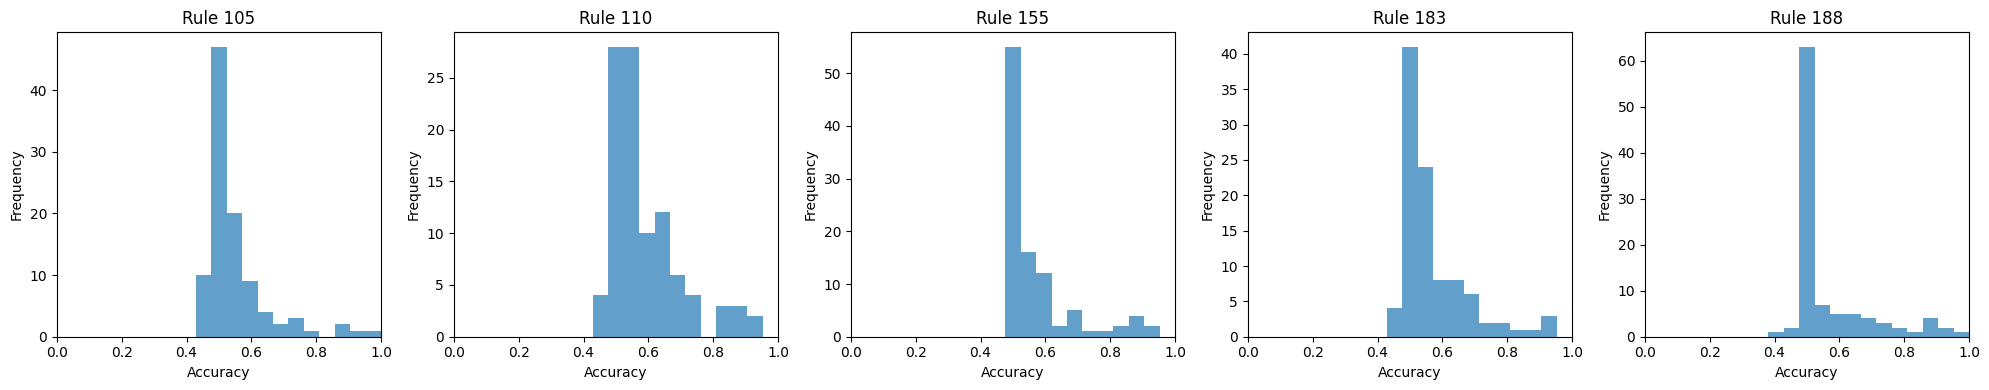

Random High


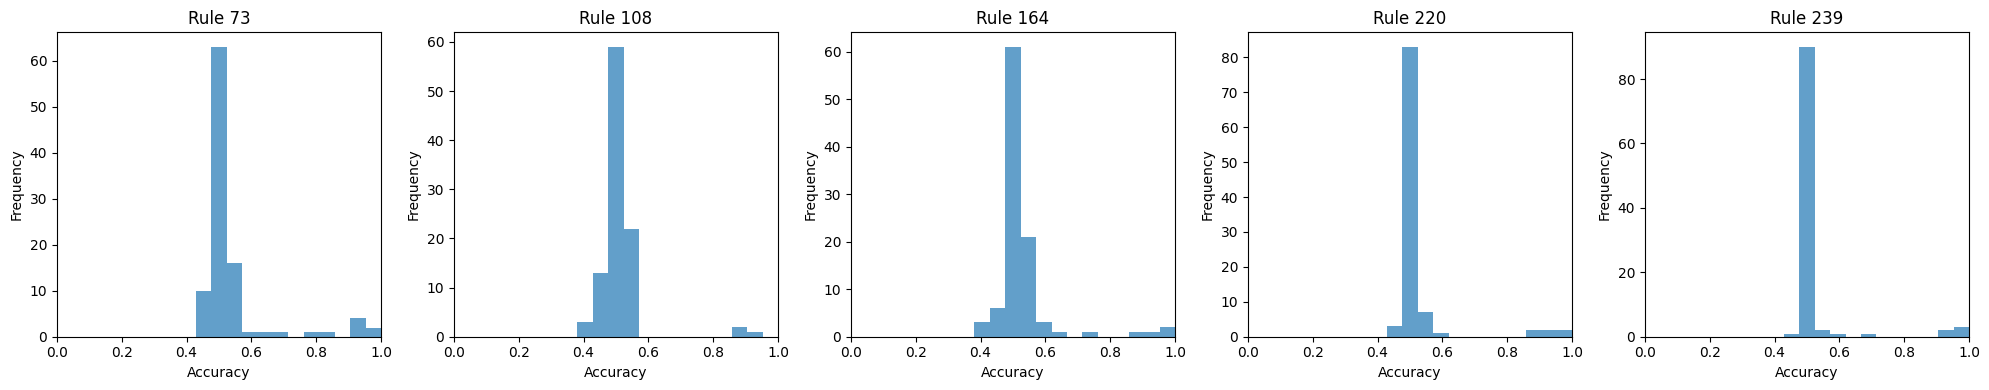

Mostly Random Low


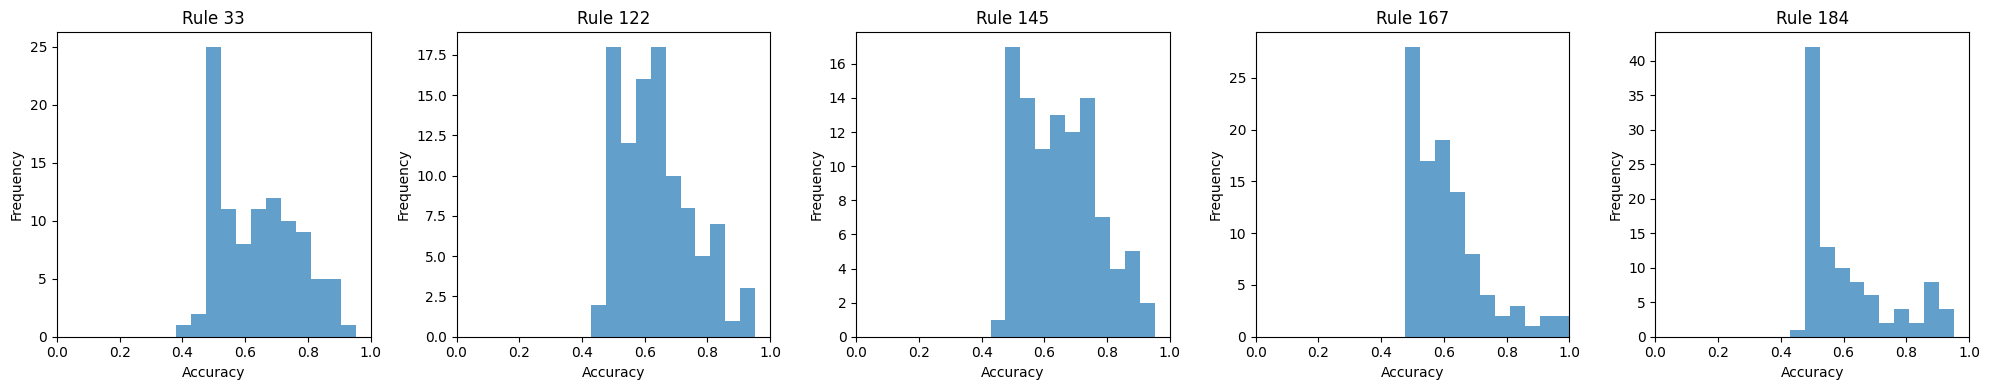

Mostly Random High


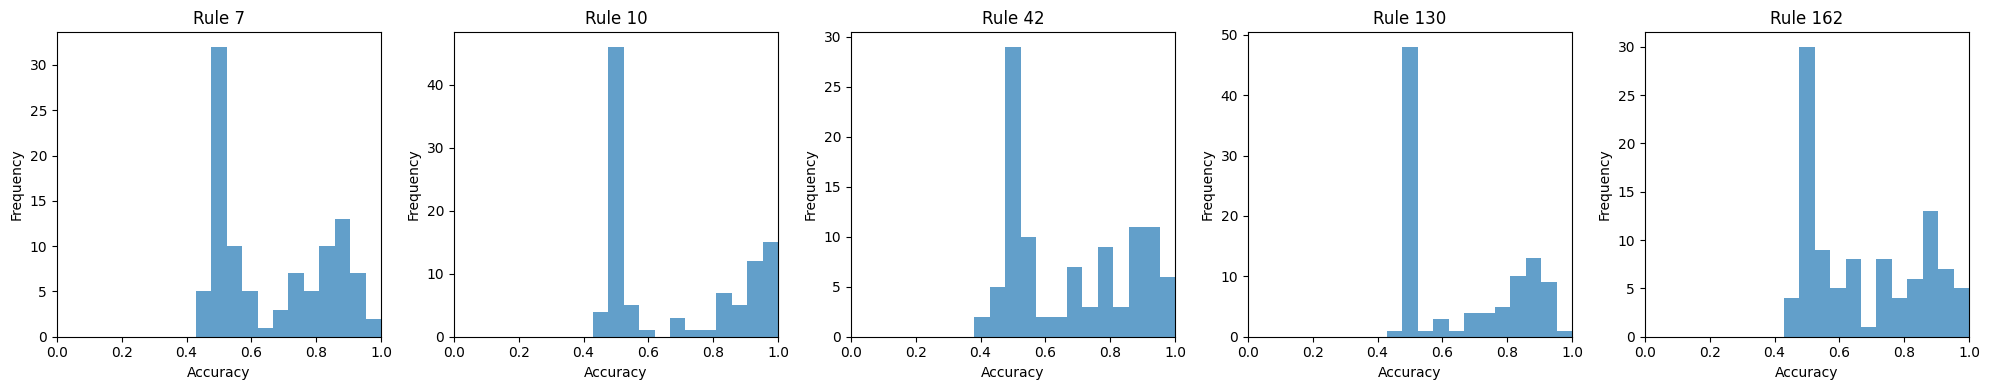

Learning Low


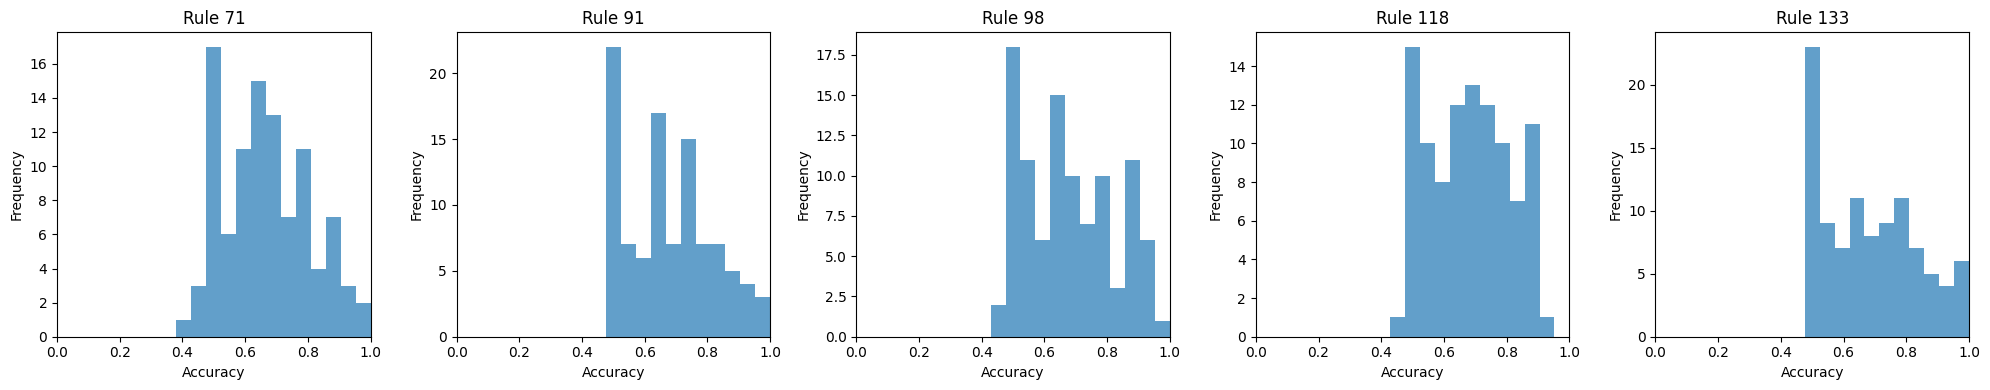

Learning High


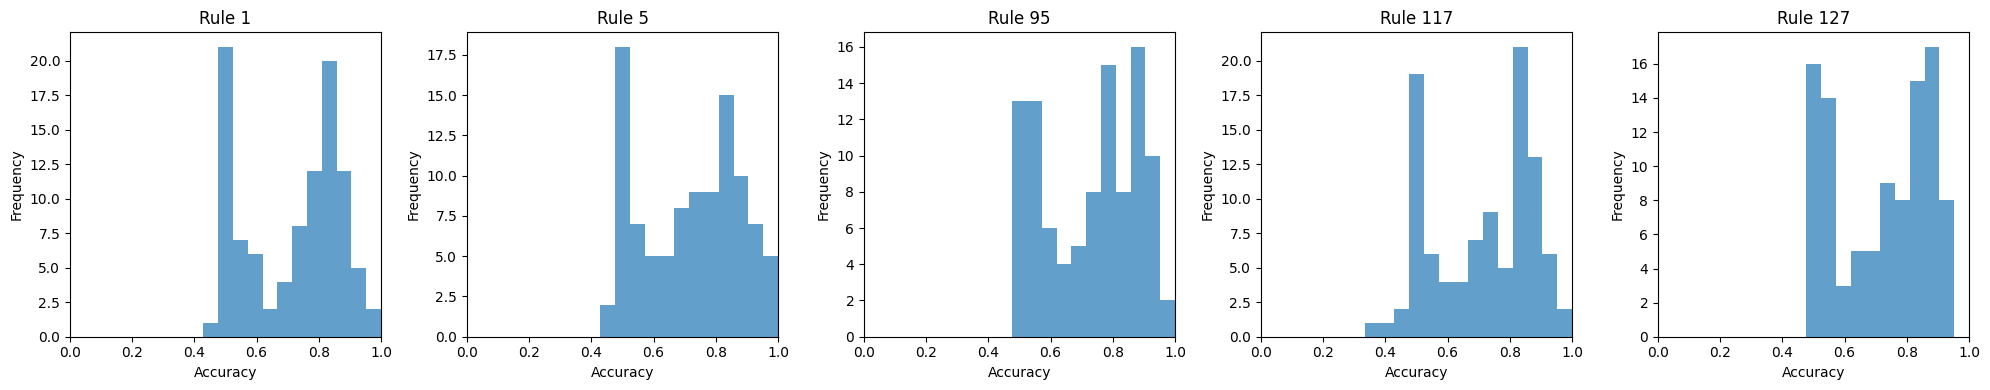

Learning well Low


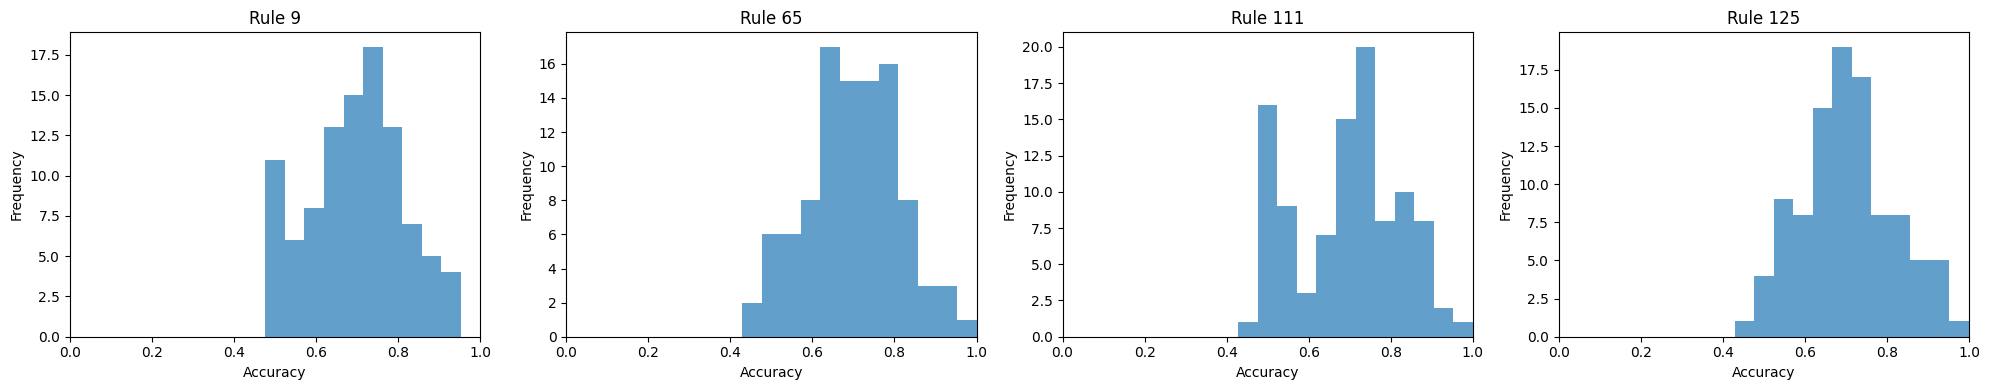

Learning well High
There are no rules for this combination


In [80]:
# Assuming 'grouped_df' is your DataFrame and it has a 'rules' column with lists
for index, row in grouped_rules.iterrows():
    print(row['geq_062_group'], row['mean_062_group'])

    plotHistogram(row['rules'])